# Explore the effect of correlations

In [1]:
import orsa
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

print(orsa.__version__)

0.8.5


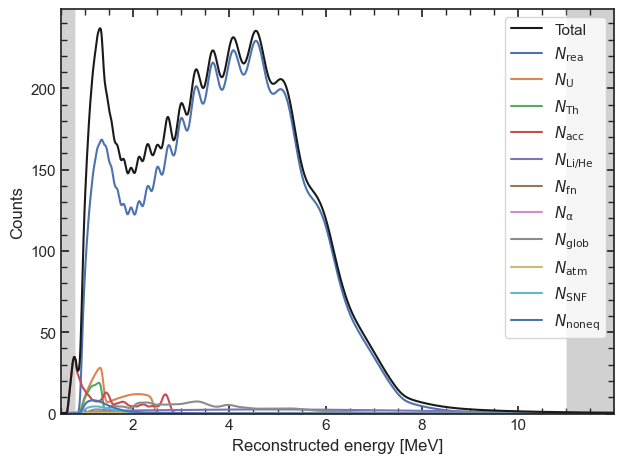

In [2]:
model = orsa.model.read_json('inputs/test_model.json')
model.exposure = 6*365.25
model

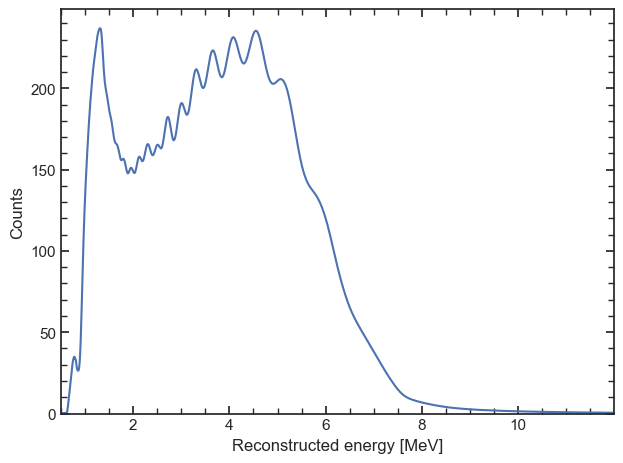

In [3]:
data = model.get_spectrum(asimov = True)
data

In [4]:
model.use_shape_uncertainty = False
cf = orsa.probability.CostFunction(ll=orsa.probability.ll_binned, model=model, data=data, ll_args = dict())
true_values = cf.get_params_to_fit()[0]
res = orsa.fit.minuit(cf)
res.true_values = true_values

Cost function parsed as LogLikelihood-like


c:\Users\metal\miniconda3\envs\orsa\Lib\site-packages\orsa\fit\minimizers.py:152: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(


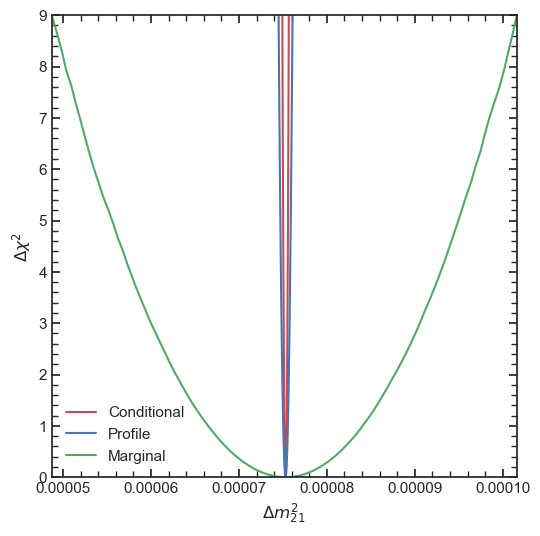

In [5]:
label = 'dm2_21:'
res.get_samples(100000)
n_points = 101

fig, ax = plt.subplots(figsize = (6,6))
fig, ax = orsa.plot.profile(res, label = label, kind = 'conditional', n_sigmas = 3, n_samples = n_points, use_minuit = False, subtract_min = True, ax = ax, c = 'r', plot_kwargs=dict(ls = '-', label = 'Conditional'))
fig, ax = orsa.plot.profile(res, label = label, kind = 'profile', n_sigmas = 3, n_samples = n_points, use_minuit = False, subtract_min = True, ax = ax, c = 'b', plot_kwargs=dict(ls = '-', label = 'Profile'))

# Marginalization is unreliable when covariance is not positive-semidefinite. Try using emcce for the fit.
fig, ax = orsa.plot.profile(res, label = label, kind = 'marginal', n_sigmas = 3, n_samples = n_points, use_minuit = False, subtract_min = True, ax = ax, c = 'g', plot_kwargs=dict(ls = '-', label = 'Marginal'))
ax.legend(frameon = False)

In [7]:
fig, axes = orsa.plot.profiles(res, kind = 'conditional', n_sigmas = 1, n_samples = n_points, use_minuit = False, subtract_min = False, axes = None, c = 'r', plot_kwargs = dict(ls = '-', label = 'Conditional'), n_cols = 5, box_size = 3, which = None)
fig, axes = orsa.plot.profiles(res, kind = 'profile', n_sigmas = 1, n_samples = n_points, use_minuit = False, subtract_min = False, axes = axes, c = 'b', plot_kwargs = dict(ls = '-', label = 'Profile'), n_cols = 5, box_size = 3, which = None)